<a href="https://colab.research.google.com/github/CrisGiacomazzi/Customer-Cluster/blob/main/Customer_ML_PBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q powerbiclient

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from powerbiclient import QuickVisualize, get_dataset_config, Report
from powerbiclient.authentication import DeviceCodeLoginAuthentication
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.9/684.9 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.2/113.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.1 MB/s eta 0:00:00


In [2]:
dataset_clients = pd.read_csv('/content/data_clients.csv')

##**1. Data Cleaning step**

In [3]:
dataset_clients.head(10)

,id,age,annual_income,purchase_power_score
0,1,56,94740.0,90
1,2,69,136352.0,50
2,3,46,86617.0,62
3,4,32,114841.0,97
4,5,60,36896.0,51
5,6,25,145729.0,37
6,7,38,66175.0,96
7,8,56,27805.0,87
8,9,36,25237.0,78
9,10,40,135247.0,29


In [4]:
dataset_clients.shape

(501, 4)

In [5]:
missing_values_count = dataset_clients.isnull().sum()
missing_values_count

,0
id,0
age,0
annual_income,4
purchase_power_score,0


In [6]:
total_cells= np.product(dataset_clients.shape)
total_missing = missing_values_count.sum()
total_missing

4

In [7]:
percent_missing = (total_missing/total_cells)*100
percent_missing

0.19960079840319359

In [8]:
duplicate_rows = dataset_clients[dataset_clients.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)

num_duplicates = len(duplicate_rows)
print(f"\nNumber of duplicate rows: {num_duplicates}")

Duplicate Rows:
    id  age  annual_income  purchase_power_score
10  10   40       135247.0                    29

Number of duplicate rows: 1


In [9]:
dataset_clients = dataset_clients.drop_duplicates()

In [10]:
duplicate_rows_after_removal = dataset_clients[dataset_clients.duplicated()]
num_duplicates_after_removal = len(duplicate_rows_after_removal)
print(f"\nNumber of duplicate rows after removal: {num_duplicates_after_removal}")


Number of duplicate rows after removal: 0


In [11]:
average_annual_income = dataset_clients['annual_income'].mean()

In [12]:
dataset_clients['annual_income'].fillna(average_annual_income, inplace=True)

<ipython-input-12-f0eac7d3c5ee>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_clients['annual_income'].fillna(average_annual_income, inplace=True)


In [13]:
print(dataset_clients.isnull().sum())

id                      0
age                     0
annual_income           0
purchase_power_score    0
dtype: int64


In [14]:
#dataset_clients.head(12)

##**2. Exploratory Analysis**

In [15]:
dataset_clients[['age','annual_income','purchase_power_score']].describe()

,age,annual_income,purchase_power_score
count,500.000000,500.000000,500.000000
mean,44.732000,81501.377016,48.512000
std,15.239707,36621.580957,29.556946
min,18.000000,20384.000000,0.000000
25%,32.000000,49328.500000,24.000000
50%,45.000000,79384.500000,48.500000
75%,57.000000,112942.000000,73.250000
max,70.000000,149695.000000,100.000000


## **3. Preprocessing step**

In [16]:
standardize = StandardScaler()

In [17]:
standardize_dataset = standardize.fit_transform(dataset_clients[['age','annual_income','purchase_power_score']])

In [18]:
print(standardize_dataset)

[[ 0.74012478  0.3618599   1.40506904]
 [ 1.59401387  1.49926777  0.05039391]
 [ 0.08328703  0.13982865  0.45679645]
 ...
 [-0.31081563  0.32941485  0.18586143]
 [-1.23038848 -1.49133429  1.43893592]
 [-1.03333716 -0.97218626 -0.59307677]]


##**4. Machine Learning Model**

In [19]:
k = 3

In [20]:
model_kmeans = KMeans (n_clusters = k)

In [21]:
model_kmeans.fit(standardize_dataset)

KMeans(n_clusters=3)

In [22]:
dataset_clients['cluster'] = model_kmeans.labels_

In [23]:
dataset_clients.head()

,id,age,annual_income,purchase_power_score,cluster
0,1,56,94740.0,90,1
1,2,69,136352.0,50,1
2,3,46,86617.0,62,1
3,4,32,114841.0,97,2
4,5,60,36896.0,51,0


In [24]:
#Sum of Squared Errors(SSE)
model_kmeans.inertia_

894.1212186553034

In [25]:
#dataset_clients.to_csv('dataset_clients_cluster', index = False)

In [34]:
#Determine the best number of cluster
def find_best_clusters(dataset_clients, maximum_K):

    clusters_centers = []
    k_values = []

    for k in range(1, maximum_K):

      model_kmeans = KMeans(n_clusters = k)
      model_kmeans.fit(dataset_clients)

    clusters_centers.append(model_kmeans.inertia_)
    k_values.append(k)


    return clusters_centers, k_values

In [27]:
def generate_elbow_plot(clusters_centers, k_values):

    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

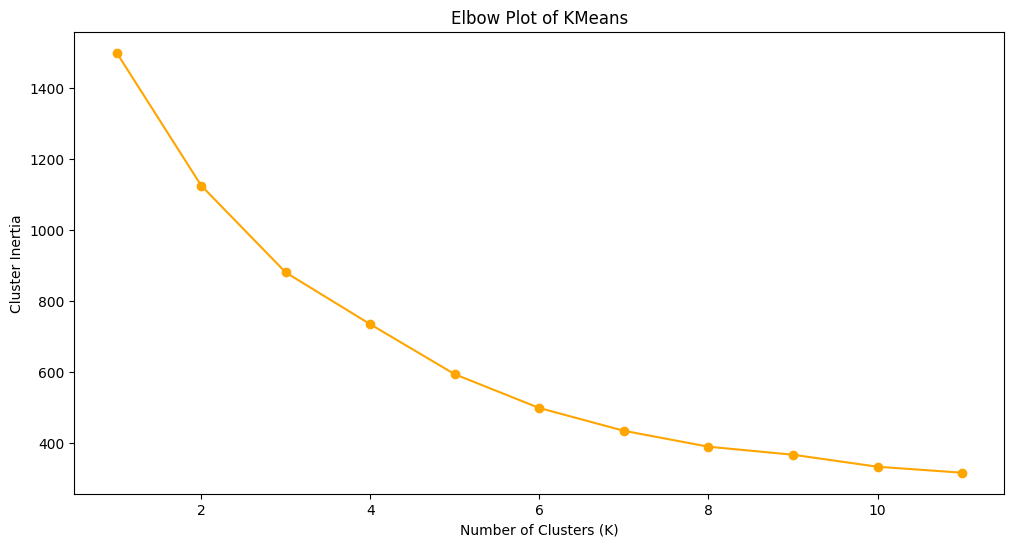

In [28]:
clusters_centers, k_values = find_best_clusters(standardize_dataset, 12)

generate_elbow_plot(clusters_centers, k_values)

##**6.Power BI report**

In [29]:
define_authentication = DeviceCodeLoginAuthentication()

Performing device flow authentication. Please follow the instructions below.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code FRNEGA53F to authenticate.

Device flow authentication successfully completed.
You are now logged in .

The result should be passed only to trusted code in your notebook.


In [30]:
from google.colab import output
output.enable_custom_widget_manager()

In [31]:
report_PBI = QuickVisualize(get_dataset_config(dataset_clients), auth=define_authentication)

In [32]:
report_PBI

QuickVisualize()